In [105]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
N = 10 # 앞의 10송이만 선택
X = iris.data[:N, :2] # 꽃받침 길이와 꽃받침 폭만 선택

pca1 = PCA(n_components = 1)
X_low = pca1.fit_transform(X)# 특징행렬을 낮은 차원의 근사행렬로 변환
X2 = pca1.inverse_transform(X_low) # 변환된 근사행렬을 원래의 차원으로 복귀

In [106]:
#  원래 데이터
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

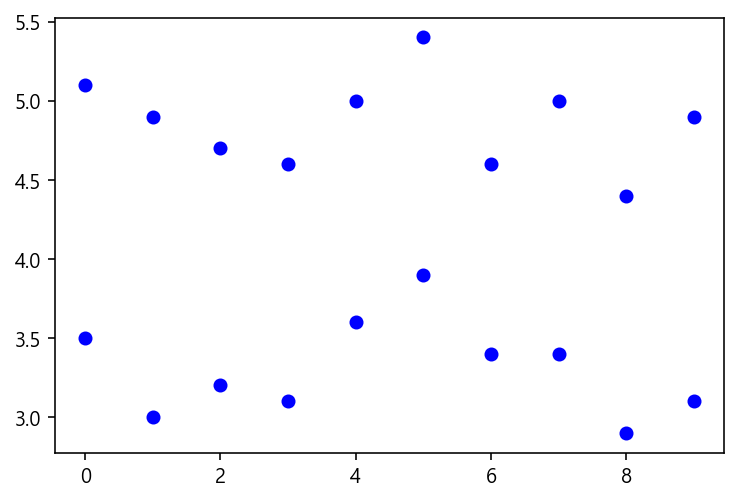

In [107]:
plt.plot(X, 'bo')

In [108]:
# 잠재변수
# 음수는 원점을 옮겼기 때문
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


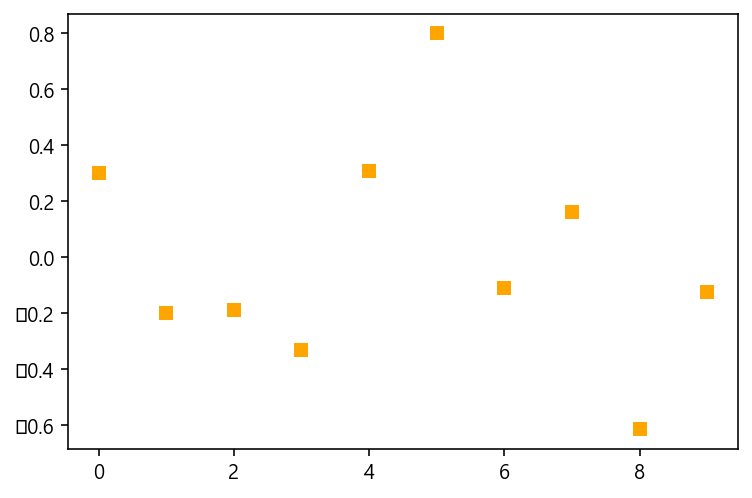

In [109]:
plt.plot(X_low, 's', color='orange')

In [110]:
# 잠재변수와 원래 데이터의 비교를 위해
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

(-0.45, 9.45, 2.734579849681696, 5.533504416416282)

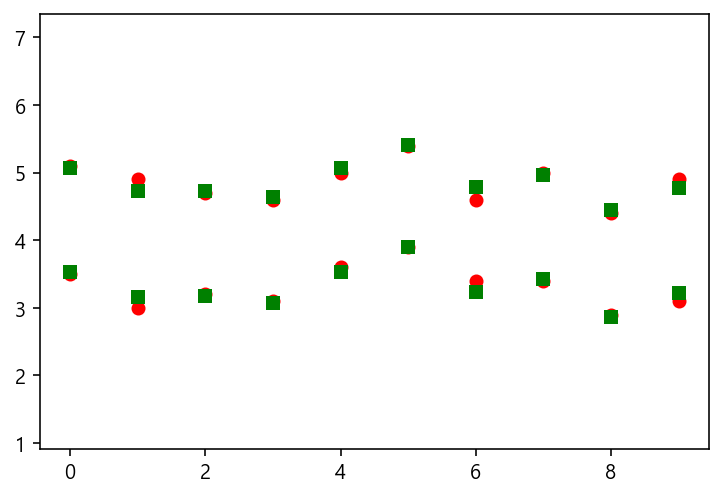

In [111]:
plt.plot(X, 'ro')
plt.plot(X2, 'gs')
plt.axis('equal')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


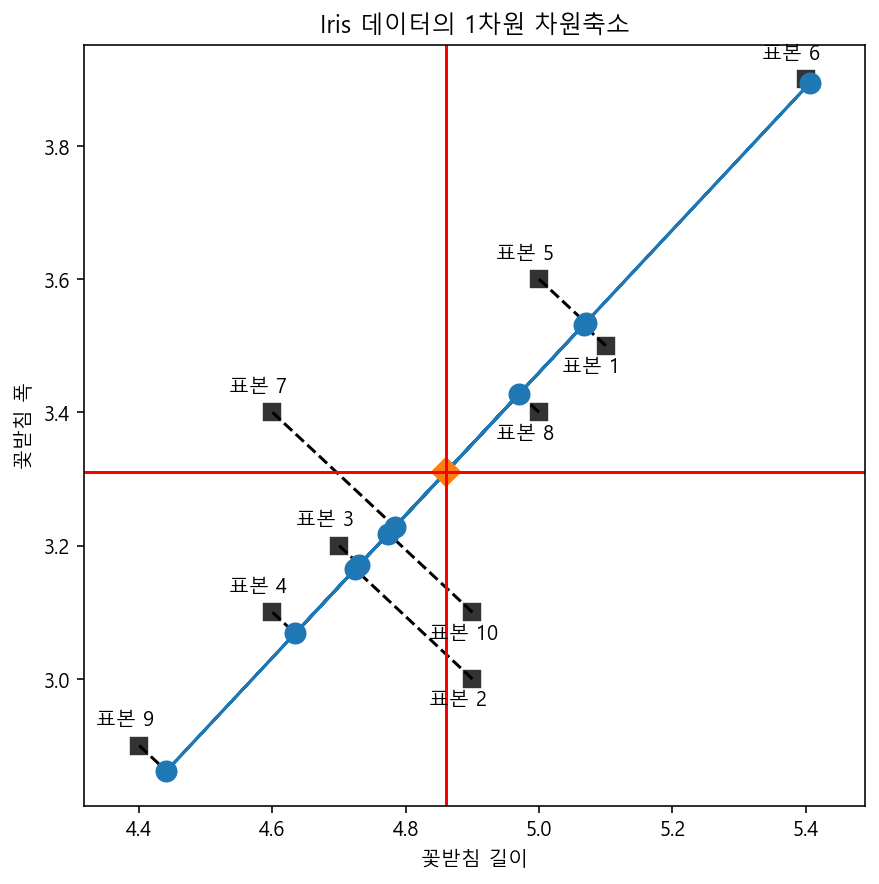

In [112]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

위 그래프에서 잠재변수 값은 원점에서부터 각 표본의 투영성분과의 거리

In [113]:
# 데이터 평균값
# 위 그래프에서의 중심위치(빨간점)

pca1.mean_

array([4.86, 3.31])

In [114]:
# 주성분 벡터, 근사 데이터를 만드는 단위기저벡터
# 파란색 기저벡터의 방향을 나타내는 단위기저벡터

pca1.components_

array([[0.68305029, 0.73037134]])

In [115]:
# 단위벡터이므로 길이는 1

np.linalg.norm(pca1.components_)

1.0

components_ 속성에 들어있는 단위기저벡터 값은 첫번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 째 고유벡터에 해당.

In [116]:
# X0에 대한 특이분해, 오른쪽 특이벡터를 계산

X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)

print(VT,'\n')
print(VT[:,0])

[[-0.68305029 -0.73037134]
 [-0.73037134  0.68305029]] 

[-0.68305029 -0.73037134]


In [117]:
# 분산행렬에 대한 고유분해, 첫번째 고유벡터

XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

print('W')
print(W,'\n')
print('V')
print(V, '\n')

W
[0.17107711 1.44192289] 

V
[[-0.73037134 -0.68305029]
 [ 0.68305029 -0.73037134]] 



In [118]:
print(V[:,np.argmax(W)])

[-0.68305029 -0.73037134]


8번째 꽃받침 길이와 꽃받침 폭은 다음과 같다.

In [119]:
X[7,:]

array([5. , 3.4])

PCA로 구한 주성분의 값 즉, 꽃의 크기는 다음과 같다.

In [120]:
X_low[7]

array([0.16136046])

이 값은 다음처럼 계산된다.

In [121]:
pca1.components_ @ (X[7,:] - pca1.mean_)

array([0.16136046])

이 주성분 값을 이용하여 다시 2차원 값으로 나타낸 근사값은 다음과 같다.

In [122]:
X2[7,:]

array([4.97021731, 3.42785306])

## 연습문제

1. 꽃잎의 길이와 꽃잎 폭을 이용하여 1차원 PCA를 수행, 꽃의 크기는 꽃잎 길이와 꽃잎 폭의 어떤 선형조합으로 나타나는가?

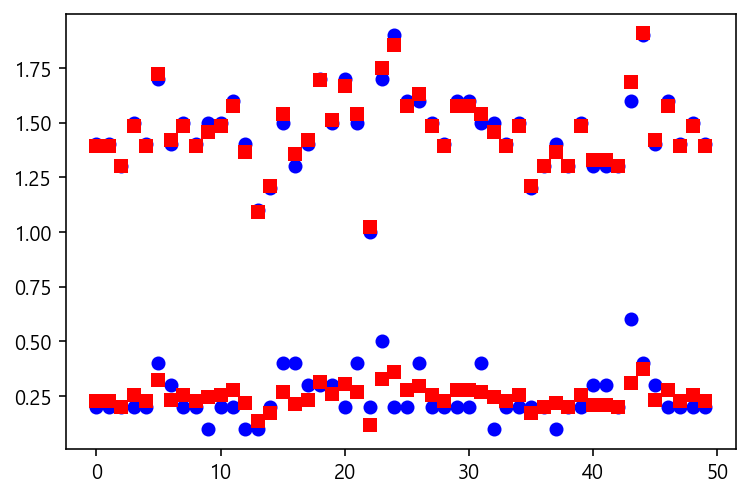

In [123]:
X = iris.data[:50, 2:]
pca2 = PCA(n_components=1)
X_low = pca2.fit_transform(X)
X2 = pca2.inverse_transform(X_low)

plt.plot(X, 'bo')
plt.plot(X2, 'rs')

In [124]:
# PCA 주성분벡터

pca2.components_

array([[0.96004653, 0.27984043]])

**꽃의 크기 = 0.96 X 꽃잎의 길이 + 0.28 X 꽃잎의 폭**

In [125]:
X[0]

array([1.4, 0.2])

In [127]:
(0.96 * X[0,0]) + (0.28 * X[0,1])

1.4

In [129]:
X_low[0]

array([-0.07239554])

(2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가?

In [103]:
X = iris.data[:50,:]
pca3 = PCA(n_components=1)
X_low = pca3.fit_transform(X)
pca3.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

**꽃의크기 = 0.67 꽃받침 길이 + 0.73 꽃받침 폭 + 0.10 꽃잎의 길이 + 0.06 꽃잎의 폭**